In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style="darkgrid")

# Define default font size
FONT_SIZE = 12
plt.rcParams.update({'font.size': FONT_SIZE})


## 0. Load Data

In [177]:
data = pd.read_csv('../data/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


## 1. Data Analysis: First Sight

### How is the date distribuited?

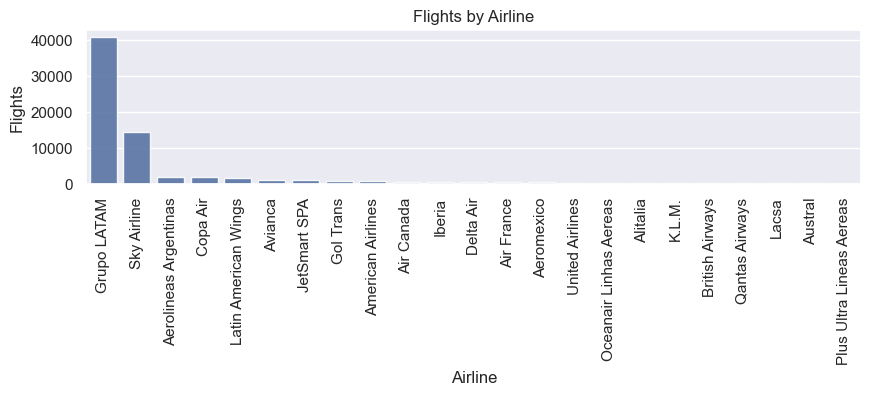

In [178]:
flights_by_airline = data['OPERA'].value_counts()
plt.figure(figsize=(10, 2))
sns.barplot(x=flights_by_airline.index, y=flights_by_airline.values, alpha=0.9)
plt.title('Flights by Airline')
plt.ylabel('Flights')
plt.xlabel('Airline')
plt.xticks(rotation=90)
plt.show()

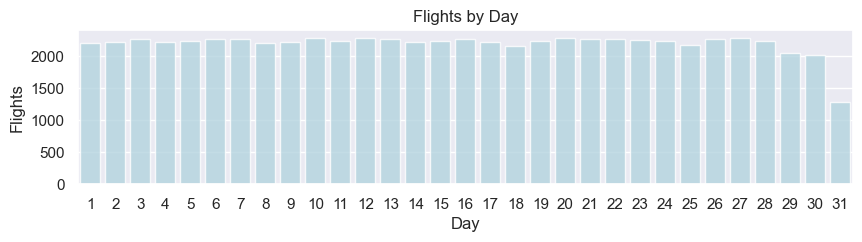

In [179]:
flights_by_day = data['DIA'].value_counts()
plt.figure(figsize=(10, 2))
sns.barplot(x=flights_by_day.index, y=flights_by_day.values, color='lightblue', alpha=0.8)
plt.title('Flights by Day')
plt.ylabel('Flights')
plt.xlabel('Day')
plt.xticks(rotation=0)
plt.show()

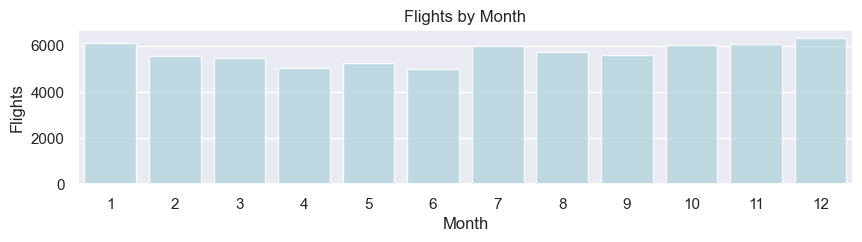

In [180]:
flights_by_month = data['MES'].value_counts()
plt.figure(figsize=(10, 2))
sns.barplot(x=flights_by_month.index, y=flights_by_month.values, color='lightblue', alpha=0.8)
plt.title('Flights by Month')
plt.ylabel('Flights')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.show()

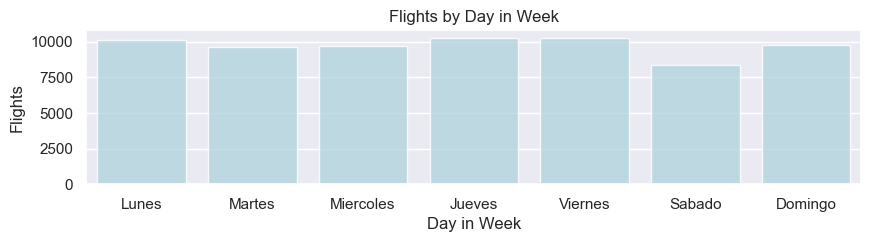

In [181]:
flights_by_day_in_week = data['DIANOM'].value_counts()
days = [
    flights_by_day_in_week.index[2],
    flights_by_day_in_week.index[5],
    flights_by_day_in_week.index[4],
    flights_by_day_in_week.index[1],
    flights_by_day_in_week.index[0],
    flights_by_day_in_week.index[6],
    flights_by_day_in_week.index[3]
]
values_by_day = [
    flights_by_day_in_week.values[2],
    flights_by_day_in_week.values[5],
    flights_by_day_in_week.values[4],
    flights_by_day_in_week.values[1],
    flights_by_day_in_week.values[0],
    flights_by_day_in_week.values[6],
    flights_by_day_in_week.values[3]
]
plt.figure(figsize=(10, 2))
sns.barplot(x=days, y=values_by_day, color='lightblue', alpha=0.8)
plt.title('Flights by Day in Week')
plt.ylabel('Flights')
plt.xlabel('Day in Week')
plt.xticks(rotation=0)
plt.show()

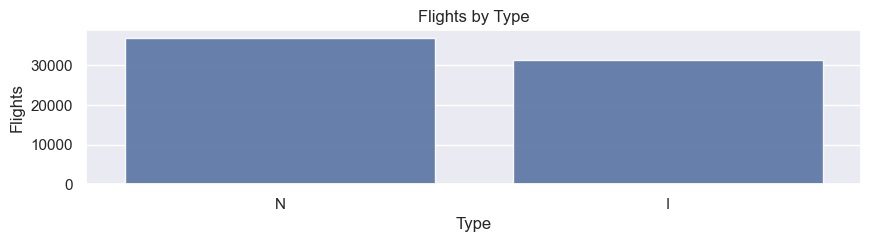

In [182]:
flights_by_type = data['TIPOVUELO'].value_counts()
plt.figure(figsize=(10, 2))
sns.barplot(x=flights_by_type.index, y=flights_by_type.values, alpha=0.9)
plt.title('Flights by Type')
plt.ylabel('Flights')
plt.xlabel('Type')
plt.show()

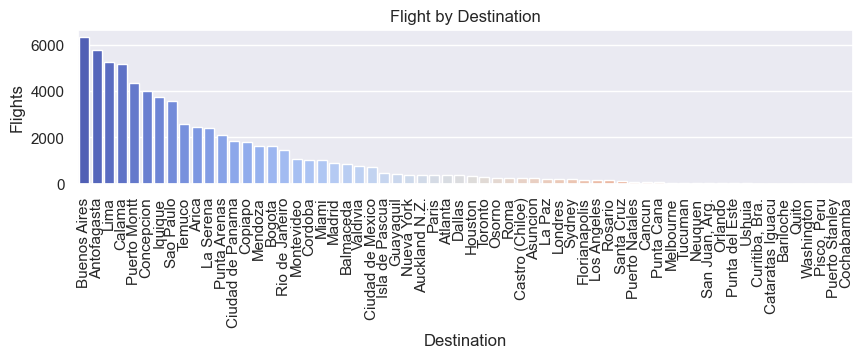

In [183]:
flight_by_destination = data['SIGLADES'].value_counts()
palette = sns.color_palette("coolwarm", len(flight_by_destination))
plt.figure(figsize=(10, 2))
sns.barplot(x=flight_by_destination.index, y=flight_by_destination.values, palette=palette, alpha=1)
plt.title('Flight by Destination')
plt.ylabel('Flights')
plt.xlabel('Destination')
plt.xticks(rotation=90)

plt.show()

## 2. Features Generation

### 2.a. Period of Day

In [184]:
from datetime import datetime, time


def get_period_day(date):
    """
    Calculate de period of day (morning, afternoon, evening)
    :param
        date: str
            Date in string with format %Y-%m-%d %H:%M:%S
    :return: 
        str
           Period of day (morning, afternoon, evening) 
    """
    try:
        date_time = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
        time_of_day = date_time.time()

        if time(5, 0) <= time_of_day < time(12, 0):
            return 'mañana'
        elif time(12, 0) <= time_of_day < time(19, 0):
            return 'tarde'
        else:
            return 'noche'
    except ValueError:
        return 'Invalid date format'

In [185]:
data['period_day'] = data['Fecha-I'].apply(get_period_day)

### 2.b. High Season

In [186]:
from datetime import datetime


def is_high_season(fecha: str):
    """
    Determine if a fecha is high season
    :param 
        fecha: str
            Fecha in string with format %Y-%m-%d %H:%M:%S
    :return: 
        int
            1: If date is high season
            0: If date is not high season
    High season period
        15-Dec to 31-Dec
        1-Jan to 3-Mar
        15-Jul to 31-Jul
        11-Sep to 30-Sep
    """
    try:
        date_time = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S')
        year = date_time.year

        high_season_ranges = [
            (datetime(year, 12, 15), datetime(year, 12, 16)),
            (datetime(year, 1, 1), datetime(year, 3, 3)),
            (datetime(year, 7, 15), datetime(year, 7, 31)),
            (datetime(year, 9, 11), datetime(year, 9, 30))
        ]

        for start, end in high_season_ranges:
            if start <= date_time <= end:
                return 1
        return 0
    except ValueError:
        return 0  # invalid date format

In [187]:
data['high_season'] = data['Fecha-I'].apply(is_high_season)

### 2.c. Difference in Minutes

In [188]:
def get_min_diff(data):
    """
    Determine de minutes between two dataframes columns
    :param
        data: pd.DataFrame
            Fecha-O: Datetime in string with format %Y-%m-%d %H:%M:%S\
            Fecha-I: Datetime in string with format %Y-%m-%d %H:%M:%S\
    :return: 
        pd.Series
            A series containing the difference between two dataframes (Fecha-I and Fecha-O)
    """
    try:
        fecha_o = datetime.strptime(data['Fecha-O'], '%Y-%m-%d %H:%M:%S')
        fecha_i = datetime.strptime(data['Fecha-I'], '%Y-%m-%d %H:%M:%S')
        min_diff = ((fecha_o - fecha_i).total_seconds()) / 60
        return min_diff
    except ValueError:
        raise ValueError('Invalid date format')

In [189]:
data['min_diff'] = data.apply(get_min_diff, axis=1)

### 2.d. Delay

In [190]:
threshold_in_minutes = 15
data['delay'] = np.where(data['min_diff'] > threshold_in_minutes, 1, 0)

In [191]:
data.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'period_day', 'high_season',
       'min_diff', 'delay'],
      dtype='object')

## 3. Data Analysis: Second Sight

### How is the delay rate across columns?

In [192]:
def get_rate_from_column(data, column):
    """
    Calculate the rate of delays for each values in a specified column
    :param:
        data: pd.DataFrame
            The DataFrame containing data
        column: str
            The name of the column         
    :return: 
        pd.DataFrame
            A DataFrame containing the rate of delays for each values in a specified column
    """
    # Count delays for each unique value in the column
    delays = data[data['delay'] == 1][column].value_counts()

    # Count total occurrences for each unique value in the column
    totals = data[column].value_counts()

    # Calculate the rates
    rates = {}
    for name in totals.index:
        if name in delays.index and delays[name] != 0:
            rates[name] = round(delays[name] / totals[name], 2) * 100
        else:
            rates[name] = 0

    return pd.DataFrame.from_dict(data=rates, orient='index', columns=['Tasa (%)'])

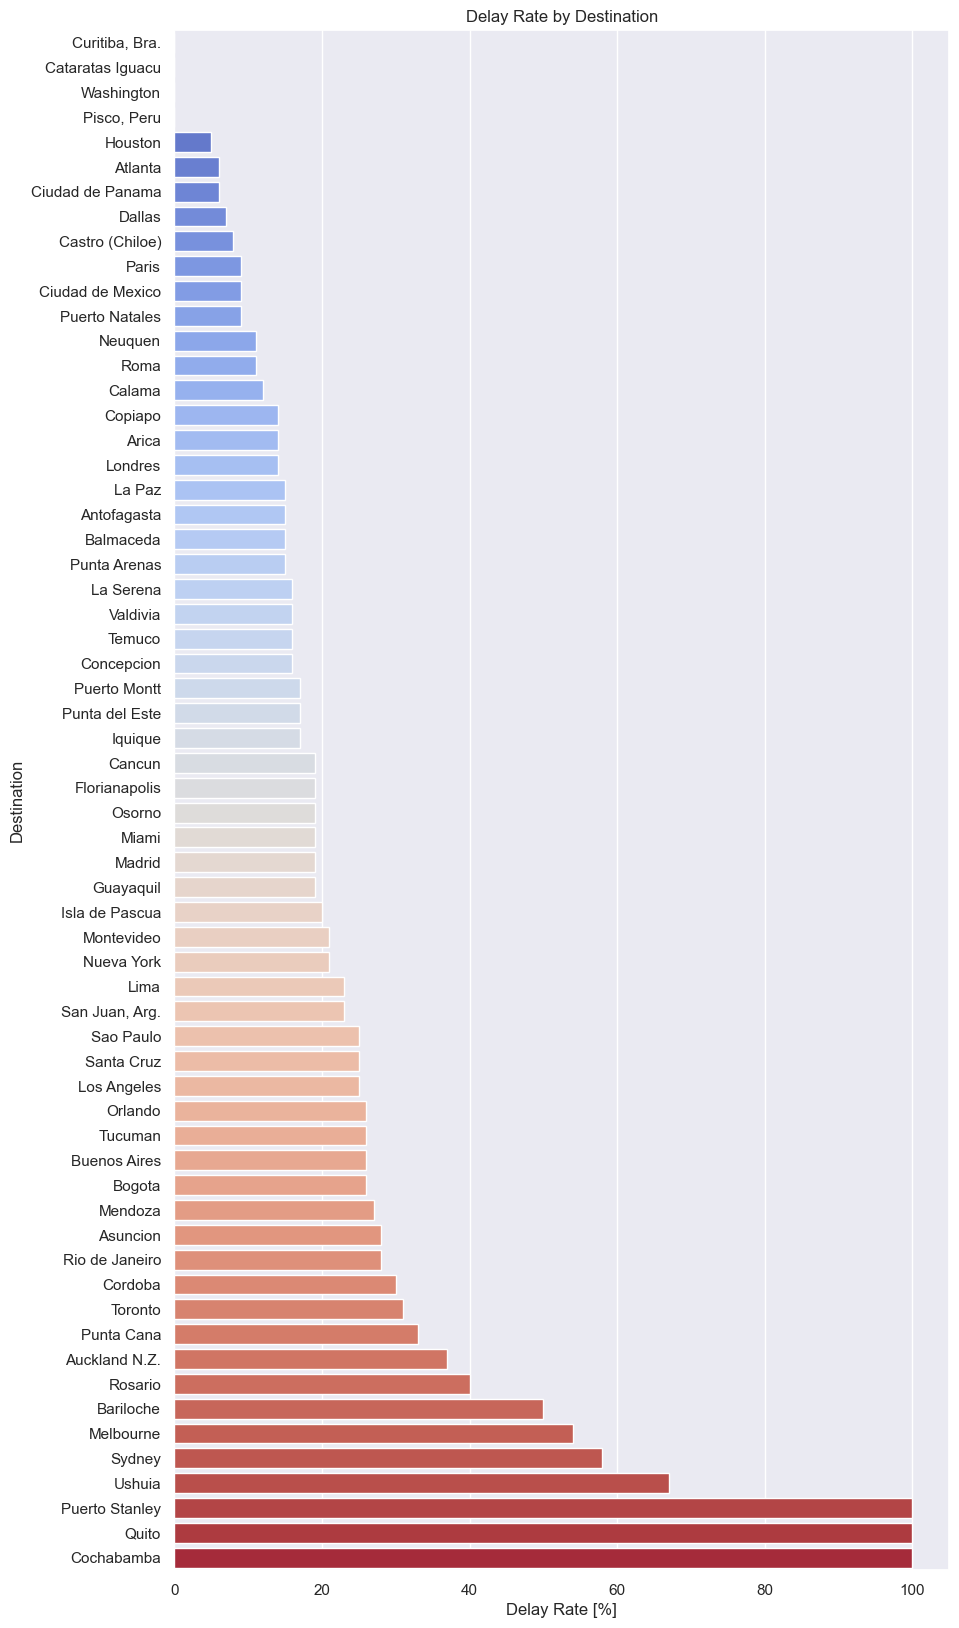

In [193]:
destination_rate = get_rate_from_column(data, 'SIGLADES')
destination_rate_tasa = destination_rate['Tasa (%)']
destination_rate_tasa_order = destination_rate_tasa.sort_values(ascending=True)
palette = sns.color_palette("coolwarm", len(destination_rate_tasa_order))

plt.figure(figsize=(10, 20))
sns.barplot(y=destination_rate_tasa_order.index, x=destination_rate_tasa_order.values, palette=palette, alpha=1)
plt.title('Delay Rate by Destination')
plt.xlabel('Delay Rate [%]')
plt.ylabel('Destination')
plt.xticks(rotation=0)
plt.show()


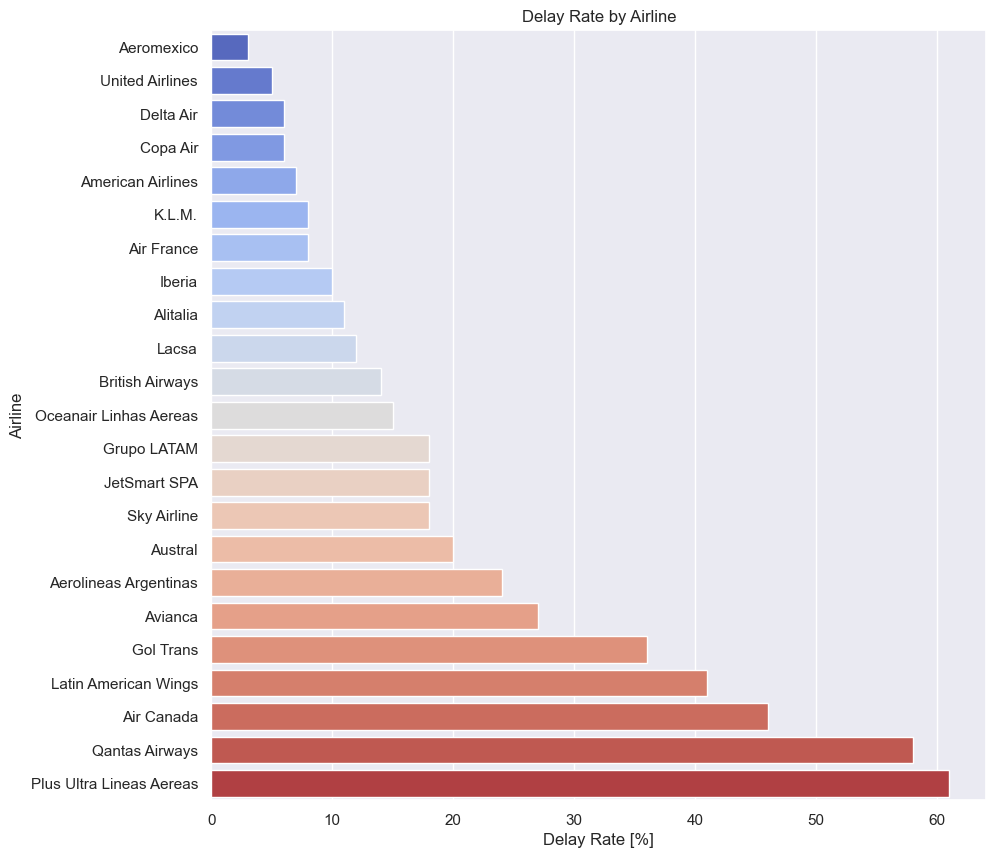

In [194]:
airlines_rate = get_rate_from_column(data, 'OPERA')
airlines_rate_tasa = airlines_rate['Tasa (%)']
airlines_rate_tasa = airlines_rate_tasa.sort_values(ascending=True)
palette = sns.color_palette("coolwarm", len(airlines_rate_tasa))

plt.figure(figsize=(10, 10))
sns.barplot(y=airlines_rate_tasa.index, x=airlines_rate_tasa.values, palette=palette, alpha=1)
plt.title('Delay Rate by Airline')
plt.xlabel('Delay Rate [%]')
plt.ylabel('Airline')
plt.xticks(rotation=0)
plt.show()

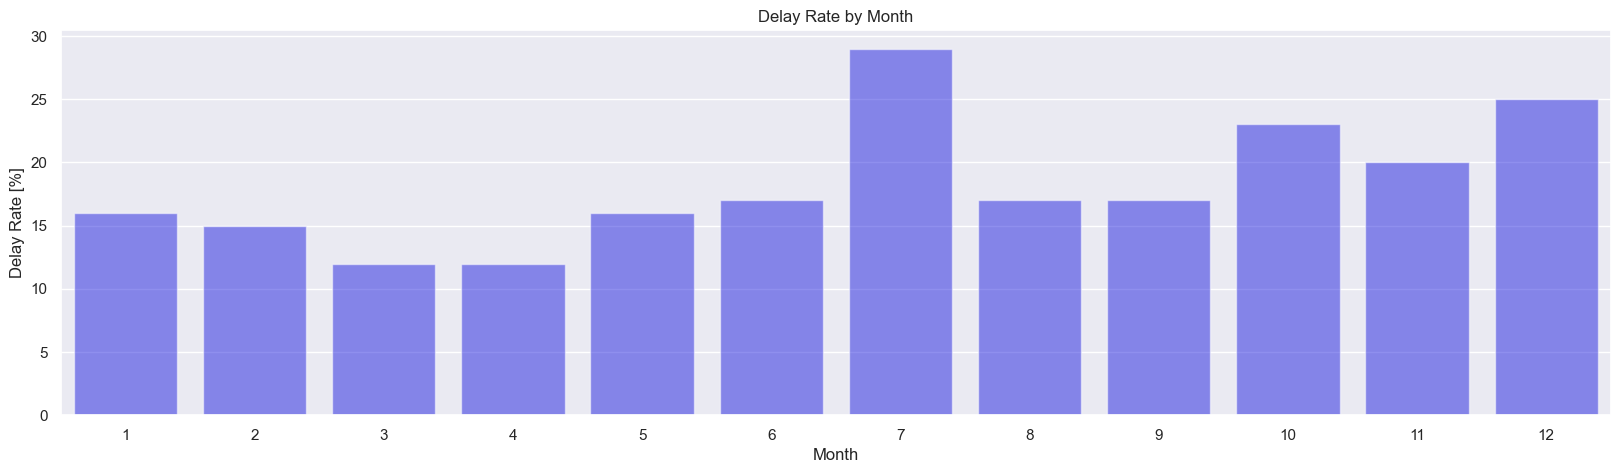

In [195]:
month_rate = get_rate_from_column(data, 'MES')
month_rate_value = data['MES'].value_counts().index
plt.figure(figsize=(20, 5))

sns.barplot(x=month_rate_value, y=month_rate['Tasa (%)'], color='blue', alpha=0.5)
plt.title('Delay Rate by Month')
plt.ylabel('Delay Rate [%]')
plt.xlabel('Month')
plt.xticks()
plt.show()

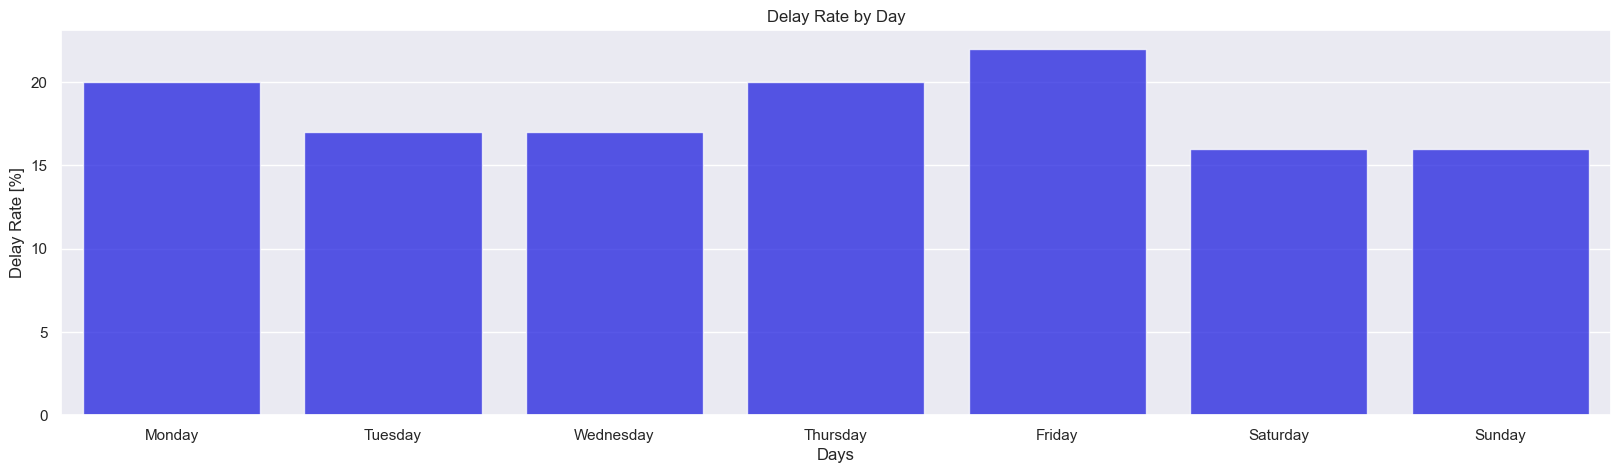

In [196]:
days_rate = get_rate_from_column(data, 'DIANOM')
days_rate_tasa = days_rate['Tasa (%)']

days_convertion = {
    'Lunes': 'Monday',
    'Martes': 'Tuesday',
    'Miercoles': 'Wednesday',
    'Jueves': 'Thursday',
    'Viernes': 'Friday',
    'Sabado': 'Saturday',
    'Domingo': 'Sunday'
}

days_rate_tasa = days_rate_tasa.reindex(days_convertion.keys())

days_rate_tasa.index = days_rate_tasa.index.map(days_convertion)

plt.figure(figsize=(20, 5))
sns.barplot(y=days_rate_tasa.values, x=days_rate_tasa.index, color='blue', alpha=0.75)
plt.title('Delay Rate by Day')
plt.ylabel('Delay Rate [%]')
plt.xlabel('Days')
plt.xticks()
plt.show()

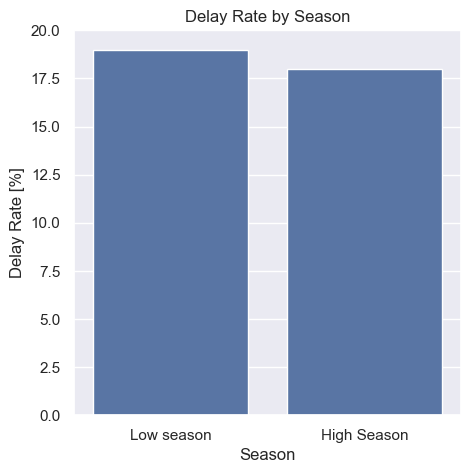

In [197]:
high_season_rate = get_rate_from_column(data, 'high_season')
high_season_rate_values = data['high_season'].value_counts().index

plt.figure(figsize=(5, 5))
sns.barplot(x=["Low season", "High Season"], y=high_season_rate['Tasa (%)'])
plt.title('Delay Rate by Season')
plt.ylabel('Delay Rate [%]')
plt.xlabel('Season')
plt.xticks()
plt.ylim(0, 20)
plt.show()

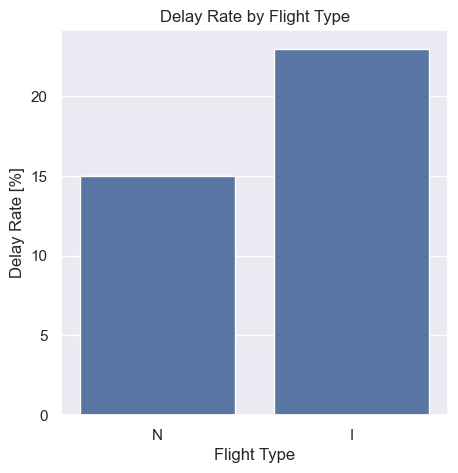

In [198]:
flight_type_rate = get_rate_from_column(data, 'TIPOVUELO')
flight_type_rate_values = data['TIPOVUELO'].value_counts().index
plt.figure(figsize=(5, 5))
sns.barplot(x=flight_type_rate_values, y=flight_type_rate['Tasa (%)'])
plt.title('Delay Rate by Flight Type')
plt.ylabel('Delay Rate [%]')
plt.xlabel('Flight Type')
plt.ylim()
plt.show()

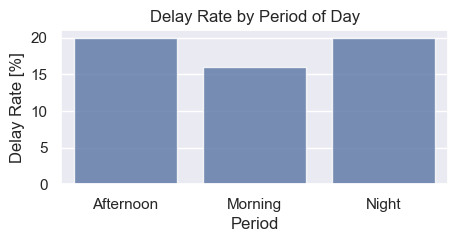

In [199]:
period_day_rate = get_rate_from_column(data, 'period_day')
period_day_rate_tasa = period_day_rate['Tasa (%)']


label_map = {'tarde': 'Afternoon', 'mañana': 'Morning', 'noche': 'Night'}
translated_labels = [label_map[label] for label in period_day_rate_tasa.index]


plt.figure(figsize=(5, 2))
sns.set(style="darkgrid")
sns.barplot(x=translated_labels, y=period_day_rate_tasa.values, alpha=0.8)
plt.title('Delay Rate by Period of Day')
plt.ylabel('Delay Rate [%]')
plt.xlabel('Period')
plt.ylim()
plt.show()

## 4. Training

### 4.a. Data Split (Training and Validation)

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report

In [201]:
training_data = shuffle(data[['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES', 'DIANOM', 'delay']], random_state=111)

In [202]:
features = pd.concat([
    pd.get_dummies(data['OPERA'], prefix='OPERA'),
    pd.get_dummies(data['TIPOVUELO'], prefix='TIPOVUELO'),
    pd.get_dummies(data['MES'], prefix='MES')],
    axis=1
)
target = training_data['delay']

In [203]:
features

,OPERA_Aerolineas Argentinas,OPERA_Aeromexico,OPERA_Air Canada,OPERA_Air France,OPERA_Alitalia,OPERA_American Airlines,OPERA_Austral,OPERA_Avianca,OPERA_British Airways,OPERA_Copa Air,...,MES_3,MES_4,MES_5,MES_6,MES_7,MES_8,MES_9,MES_10,MES_11,MES_12
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
68202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
68203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
68204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [204]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

In [205]:
print(f"train shape: {x_train.shape} | test shape: {x_test.shape}")

train shape: (45698, 37) | test shape: (22508, 37)


In [206]:
y_train.value_counts('%') * 100

0    81.379929
1    18.620071
Name: delay, dtype: float64

In [207]:
y_test.value_counts('%') * 100

0    81.76204
1    18.23796
Name: delay, dtype: float64

### 4.b. Model Selection

#### 4.b.i. XGBoost

In [244]:
import xgboost as xgb
from xgboost import plot_importance

In [246]:
xgb_model = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [247]:
xgboost_y_preds = xgb_model.predict(x_test)
xgboost_y_preds = [1 if y_pred > 0.5 else 0 for y_pred in xgboost_y_preds]

In [248]:
confusion_matrix(y_test, xgboost_y_preds)

array([[18403,     0],
       [ 4105,     0]], dtype=int64)

In [249]:
print(classification_report(y_test, xgboost_y_preds))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.00      0.00      0.00      4105

    accuracy                           0.82     22508
   macro avg       0.41      0.50      0.45     22508
weighted avg       0.67      0.82      0.74     22508



#### 4.b.ii. Logistic Regression

In [250]:
from sklearn.linear_model import LogisticRegression

In [251]:
reg_model = LogisticRegression()
reg_model.fit(x_train, y_train)

LogisticRegression()

In [252]:
reg_y_preds = reg_model.predict(x_test)

In [253]:
confusion_matrix(y_test, reg_y_preds)

array([[18403,     0],
       [ 4105,     0]], dtype=int64)

In [254]:
print(classification_report(y_test, reg_y_preds))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.00      0.00      0.00      4105

    accuracy                           0.82     22508
   macro avg       0.41      0.50      0.45     22508
weighted avg       0.67      0.82      0.74     22508



## 5. Data Analysis: Third Sight

### Feature Importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 2000x500 with 0 Axes>

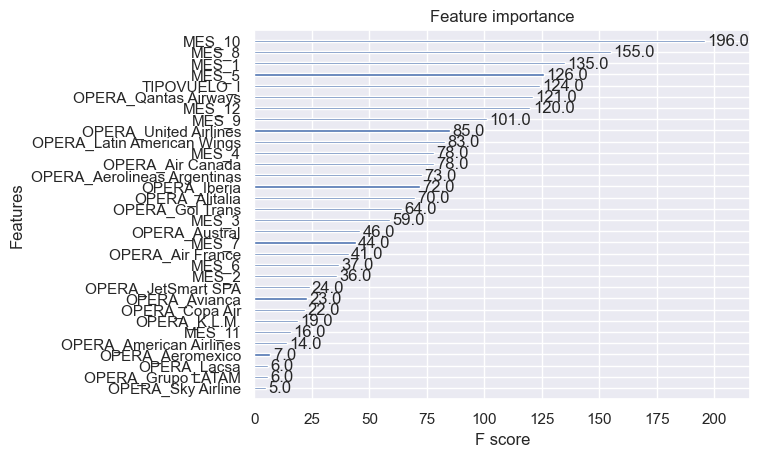

In [255]:
plt.figure(figsize=(20, 5))
plot_importance(xgb_model)


In [257]:
booster = xgb_model.get_booster()
importance = booster.get_score(importance_type='weight')

sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

top_10_features_automatic = [feature for feature, score in sorted_importance[:10]]
top_10_features_automatic

['MES_10',
 'MES_8',
 'MES_1',
 'MES_5',
 'TIPOVUELO_I',
 'OPERA_Qantas Airways',
 'MES_12',
 'MES_9',
 'OPERA_United Airlines',
 'OPERA_Latin American Wings']

In [258]:
top_10_features = [
    "OPERA_Latin American Wings",
    "MES_7",
    "MES_10",
    "OPERA_Grupo LATAM",
    "MES_12",
    "TIPOVUELO_I",
    "MES_4",
    "MES_11",
    "OPERA_Sky Airline",
    "OPERA_Copa Air"
]

In [259]:
auto_not_in_hardcoded = set(top_10_features_automatic) - set(top_10_features)
hardcoded_not_in_auto = set(top_10_features) - set(top_10_features_automatic)

print(f"Features in automatic but not in hardcoded: {auto_not_in_hardcoded}")
print(f"Features in hardcoded but not in automatic: {hardcoded_not_in_auto}")


Features in automatic but not in hardcoded: {'OPERA_United Airlines', 'MES_8', 'MES_1', 'MES_5', 'OPERA_Qantas Airways', 'MES_9'}
Features in hardcoded but not in automatic: {'OPERA_Grupo LATAM', 'OPERA_Copa Air', 'OPERA_Sky Airline', 'MES_11', 'MES_4', 'MES_7'}


### Data Balance

In [260]:
n_y0 = len(y_train[y_train == 0])
n_y1 = len(y_train[y_train == 1])
scale = n_y0 / n_y1
print(scale)

4.3705488306499


## 6. Training with Improvement

### 6.a. Data Split

In [261]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(features[top_10_features], target, test_size=0.33,
                                                        random_state=42)

### 6.b. Model Selection

#### 6.b.i. XGBoost with Feature Importance and with Balance

In [262]:
xgb_model_2 = xgb.XGBClassifier(random_state=1, learning_rate=0.01, scale_pos_weight=scale)
xgb_model_2.fit(x_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [263]:
xgboost_y_preds_2 = xgb_model_2.predict(x_test2)

In [264]:
confusion_matrix(y_test2, xgboost_y_preds_2)

array([[ 7777, 10626],
       [ 1735,  2370]], dtype=int64)

In [226]:
print(classification_report(y_test2, xgboost_y_preds_2))

              precision    recall  f1-score   support

           0       0.82      0.42      0.56     18403
           1       0.18      0.58      0.28      4105

    accuracy                           0.45     22508
   macro avg       0.50      0.50      0.42     22508
weighted avg       0.70      0.45      0.51     22508



#### 6.b.ii. XGBoost with Feature Importance but without Balance

In [265]:
xgb_model_3 = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
xgb_model_3.fit(x_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [267]:
xgboost_y_preds_3 = xgb_model_3.predict(x_test2)

In [268]:
confusion_matrix(y_test2, xgboost_y_preds_3)

array([[18403,     0],
       [ 4105,     0]], dtype=int64)

In [269]:
print(classification_report(y_test2, xgboost_y_preds_3))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.00      0.00      0.00      4105

    accuracy                           0.82     22508
   macro avg       0.41      0.50      0.45     22508
weighted avg       0.67      0.82      0.74     22508



#### 6.b.iii. Logistic Regression with Feature Importante and with Balance

In [270]:
reg_model_2 = LogisticRegression(class_weight={1: n_y0 / len(y_train), 0: n_y1 / len(y_train)})
reg_model_2.fit(x_train2, y_train2)

LogisticRegression(class_weight={0: 0.18620070900258218, 1: 0.8137992909974179})

In [271]:
reg_y_preds_2 = reg_model_2.predict(x_test2)

In [272]:
confusion_matrix(y_test2, reg_y_preds_2)

array([[ 7738, 10665],
       [ 1705,  2400]], dtype=int64)

In [273]:
print(classification_report(y_test2, reg_y_preds_2))

              precision    recall  f1-score   support

           0       0.82      0.42      0.56     18403
           1       0.18      0.58      0.28      4105

    accuracy                           0.45     22508
   macro avg       0.50      0.50      0.42     22508
weighted avg       0.70      0.45      0.51     22508



#### 6.b.iv. Logistic Regression with Feature Importante but without Balance

In [274]:
reg_model_3 = LogisticRegression()
reg_model_3.fit(x_train2, y_train2)

LogisticRegression()

In [236]:
reg_y_preds_3 = reg_model_3.predict(x_test2)

In [275]:
confusion_matrix(y_test2, reg_y_preds_3)

array([[18403,     0],
       [ 4105,     0]], dtype=int64)

In [276]:
print(classification_report(y_test2, reg_y_preds_3))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.00      0.00      0.00      4105

    accuracy                           0.82     22508
   macro avg       0.41      0.50      0.45     22508
weighted avg       0.67      0.82      0.74     22508



## 7. Data Science Conclusions

By looking at the results of the 6 trained models, it can be determined:
- There is no noticeable difference in results between XGBoost and LogisticRegression.
- Does not decrease the performance of the model by reducing the features to the 10 most important.
- Improves the model's performance when balancing classes, since it increases the recall of class "1".

**With this, the model to be productive must be the one that is trained with the top 10 features and class balancing, but which one?**